In [239]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
from sklearn.preprocessing import StandardScaler

In [241]:
from sklearn.neighbors import KNeighborsClassifier

In [517]:
inputdata1 = pd.read_excel("Individual_physician_data.xlsm")
inputdata2 = pd.read_excel("Physician_activity_over_past_10_quarters.xlsm")

In [518]:
inputdata1.head()

,physician_id,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality
0,1,0.91,0.89,M,58,83,nephrology
1,2,0.21,0.89,M,41,71,other
2,3,1.00,0.58,M,38,71,nephrology
3,4,0.96,0.96,M,42,69,nephrology
4,5,1.00,0.20,M,38,69,nephrology


In [519]:
inputdata2.head()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_segment
0,1,201802,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,201803,0,10,11,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,NaN
2,1,201804,1,8,8,0,0,0,0,0,...,15,0,0,0,0,1,1,109,19,NaN
3,1,201901,1,11,24,0,0,0,0,0,...,29,0,0,0,0,1,1,204,18,NaN
4,1,201902,1,15,44,0,0,0,0,0,...,35,0,0,0,0,1,1,180,37,NaN


In [520]:
df_train = pd.merge(inputdata1, inputdata2, on='physician_id', how="left")

In [521]:
df_train.head()

,physician_id,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,year_quarter,brand_prescribed,total_representative_visits,...,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_segment
0,1,0.91,0.89,M,58,83,nephrology,201802,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,0.91,0.89,M,58,83,nephrology,201803,0,10,...,0,0,0,0,0,0,1,0,0,NaN
2,1,0.91,0.89,M,58,83,nephrology,201804,1,8,...,15,0,0,0,0,1,1,109,19,NaN
3,1,0.91,0.89,M,58,83,nephrology,201901,1,11,...,29,0,0,0,0,1,1,204,18,NaN
4,1,0.91,0.89,M,58,83,nephrology,201902,1,15,...,35,0,0,0,0,1,1,180,37,NaN


In [522]:
df_train.shape

(100000, 32)

In [523]:
df_train.physician_id.unique()

array([    1,     2,     3, ...,  9998,  9999, 10000], dtype=int64)

In [524]:
df_train.sort_values(["brand_prescribed","physician_id"], ascending=True, inplace=True) #= df_train[df_train.brand_prescribed == 1]

In [525]:
df_train.shape

(100000, 32)

In [526]:
df_train.drop_duplicates(subset=['physician_id',"brand_prescribed"], keep="last",inplace=True)

In [527]:
df_train.shape

(18498, 32)

## Checking for Null values in the dataframe

In [528]:
df_train.isnull().sum()
#There are no null values in any of the column except for physician_segment which has 51098 null values.

physician_id                                              0
urban_population_perc_in_physician_locality               0
percent_population_with_health_insurance_in_last10q       0
physician_gender                                          0
physician_tenure                                          0
physician_age                                             0
physician_speciality                                      0
year_quarter                                              0
brand_prescribed                                          0
total_representative_visits                               0
total_sample_dropped                                      0
saving_cards_dropped                                      0
vouchers_dropped                                          0
total_seminar_as_attendee                                 0
total_seminar_as_speaker                                  0
physician_hospital_affiliation                            0
physician_in_group_practice             

In [529]:
df_train.physician_segment.unique()

array([nan, 'High', 'Medium', 'Low', 'Very High'], dtype=object)

In [530]:
df_train.physician_segment.value_counts()
# maximum value for the physician_segment is High so we will fill the null values with 
# the High has it has the maximum occurence throughout the dataset.

High         5928
Very High    3328
Medium       3028
Low          1230
Name: physician_segment, dtype: int64

In [531]:
df_train.physician_segment.value_counts() == df_train.physician_segment.value_counts().max()

High          True
Very High    False
Medium       False
Low          False
Name: physician_segment, dtype: bool

In [532]:
def datacleaning(df):
    df.physician_segment.fillna("High", inplace=True)   
    return df

In [533]:
df_train = datacleaning(df_train)

In [534]:
df_train.head()

,physician_id,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,year_quarter,brand_prescribed,total_representative_visits,...,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_segment
1,1,0.91,0.89,M,58,83,nephrology,201803,0,10,...,0,0,0,0,0,0,1,0,0,High
16,2,0.21,0.89,M,41,71,other,201904,0,0,...,5,1,0,0,1,1,1,210,10,High
21,3,1.00,0.58,M,38,71,nephrology,201803,0,18,...,0,0,0,0,0,1,1,0,0,High
39,4,0.96,0.96,M,42,69,nephrology,202003,0,3,...,17,3,19,0,0,1,1,403,44,Medium
48,5,1.00,0.20,M,38,69,nephrology,202002,0,3,...,0,2,1,0,0,1,1,68,10,Low


In [535]:
df_train.isnull().sum()

physician_id                                           0
urban_population_perc_in_physician_locality            0
percent_population_with_health_insurance_in_last10q    0
physician_gender                                       0
physician_tenure                                       0
physician_age                                          0
physician_speciality                                   0
year_quarter                                           0
brand_prescribed                                       0
total_representative_visits                            0
total_sample_dropped                                   0
saving_cards_dropped                                   0
vouchers_dropped                                       0
total_seminar_as_attendee                              0
total_seminar_as_speaker                               0
physician_hospital_affiliation                         0
physician_in_group_practice                            0
total_prescriptions_for_indicat

In [536]:
df_train.shape

(18498, 32)

In [537]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18498 entries, 1 to 99999
Data columns (total 32 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   physician_id                                         18498 non-null  int64  
 1   urban_population_perc_in_physician_locality          18498 non-null  float64
 2   percent_population_with_health_insurance_in_last10q  18498 non-null  float64
 3   physician_gender                                     18498 non-null  object 
 4   physician_tenure                                     18498 non-null  int64  
 5   physician_age                                        18498 non-null  int64  
 6   physician_speciality                                 18498 non-null  object 
 7   year_quarter                                         18498 non-null  int64  
 8   brand_prescribed                                     18498 non-nul

In [538]:
df_train.select_dtypes(include=['object']).columns

Index(['physician_gender', 'physician_speciality', 'physician_segment'], dtype='object')

In [539]:
df_train.physician_gender.unique()

array(['M', 'F', 'Unknown'], dtype=object)

In [540]:
df_train.physician_speciality.unique()

array(['nephrology', 'other', 'urology'], dtype=object)

In [541]:
df_train.physician_segment.unique()

array(['High', 'Medium', 'Low', 'Very High'], dtype=object)

In [542]:
def objectdataconversion(df):
    cat_columns = ['physician_gender', 'physician_speciality', 'physician_segment']
    for col in cat_columns:
        df = pd.concat([df.drop(col, axis=1),
                                pd.get_dummies(df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    return df    

In [543]:
df_train = objectdataconversion(df_train)

In [544]:
df_train.head()

,physician_id,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_tenure,physician_age,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,...,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_gender_M,physician_gender_Unknown,physician_speciality_other,physician_speciality_urology,physician_segment_Low,physician_segment_Medium,physician_segment_Very High
1,1,0.91,0.89,58,83,201803,0,10,11,0,...,1,0,0,1,0,0,0,0,0,0
16,2,0.21,0.89,41,71,201904,0,0,0,0,...,1,210,10,1,0,1,0,0,0,0
21,3,1.00,0.58,38,71,201803,0,18,21,4,...,1,0,0,1,0,0,0,0,0,0
39,4,0.96,0.96,42,69,202003,0,3,12,0,...,1,403,44,1,0,0,0,0,1,0
48,5,1.00,0.20,38,69,202002,0,3,0,0,...,1,68,10,1,0,0,0,1,0,0


In [545]:
df_train.shape

(18498, 36)

In [546]:
df_train.isnull().sum()

physician_id                                           0
urban_population_perc_in_physician_locality            0
percent_population_with_health_insurance_in_last10q    0
physician_tenure                                       0
physician_age                                          0
year_quarter                                           0
brand_prescribed                                       0
total_representative_visits                            0
total_sample_dropped                                   0
saving_cards_dropped                                   0
vouchers_dropped                                       0
total_seminar_as_attendee                              0
total_seminar_as_speaker                               0
physician_hospital_affiliation                         0
physician_in_group_practice                            0
total_prescriptions_for_indication1                    0
total_prescriptions_for_indication2                    0
total_prescriptions_for_indicat

In [588]:
df_train.describe()

,physician_id,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_tenure,physician_age,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,...,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_gender_M,physician_gender_Unknown,physician_speciality_other,physician_speciality_urology,physician_segment_Low,physician_segment_Medium,physician_segment_Very High
count,18498.000000,18498.000000,18498.000000,18498.000000,18498.000000,18498.000000,18498.000000,18498.000000,18498.000000,18498.000000,...,18498.000000,18498.000000,18498.000000,18498.000000,18498.000000,18498.000000,18498.000000,18498.000000,18498.000000,18498.000000
mean,5014.095199,0.921482,0.645900,27.980430,60.054330,201951.522543,0.459401,7.227971,21.390529,1.158612,...,0.999459,376.012055,85.007514,0.561358,0.000432,0.158936,0.065196,0.066494,0.163693,0.179911
std,2889.103008,0.165583,0.321472,13.318167,14.082155,77.286010,0.498362,5.391649,50.161269,5.409143,...,0.023245,401.672783,131.922368,0.496234,0.020792,0.365626,0.246878,0.249150,0.370007,0.384124
min,1.000000,0.000000,0.010000,3.000000,28.000000,201802.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2513.000000,0.930000,0.360000,18.000000,51.000000,201902.000000,0.000000,3.000000,0.000000,0.000000,...,1.000000,116.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5024.000000,1.000000,0.840000,29.000000,61.000000,202003.000000,0.000000,6.000000,3.000000,0.000000,...,1.000000,275.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7510.750000,1.000000,0.920000,37.000000,70.000000,202003.000000,1.000000,10.000000,20.000000,0.000000,...,1.000000,514.000000,107.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10000.000000,1.000000,1.000000,68.000000,94.000000,202003.000000,1.000000,46.000000,1392.000000,140.000000,...,1.000000,9199.000000,3790.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Normalizing Data

In [547]:
X = df_train.drop(columns=["brand_prescribed", "physician_id"])
y = df_train.brand_prescribed

In [548]:
X.shape, y.shape

((18498, 34), (18498,))

In [549]:
std = StandardScaler()

In [550]:
X_scaled = std.fit(X).transform(X)

## Train and Validation Split

In [551]:
from sklearn.model_selection import train_test_split

In [552]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled,y,test_size=0.33,random_state=786)

In [553]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((12393, 34), (6105, 34), (12393,), (6105,))

## Modelling

In [554]:
model = KNeighborsClassifier(n_neighbors=3)

In [555]:
np.all(np.isfinite(X_train)),np.any(np.isnan(X_train))

(True, False)

In [556]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [557]:
y_train_pred = model.predict(X_train)

In [558]:
y_val_pred = model.predict(X_val)

In [559]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_val)
    mean_acc[n-1] = accuracy_score(y_val, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

<ipython-input-559-734b0235d181>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
<ipython-input-559-734b0235d181>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
<ipython-input-559-734b0235d181>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
<ipython-input-559-734b0235d181>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
<ipython-input-559-734b0235d181>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
<ipython-input-559-734b0235d181>:13: DeprecationWarning: elementw

array([0.68746929, 0.67108927, 0.71138411, 0.70696151, 0.72121212,
       0.71187551, 0.72760033, 0.72334152, 0.73169533])

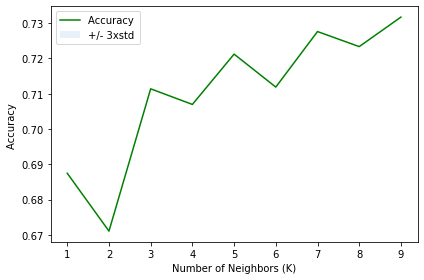

In [560]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show() # The best fit for number of neighbors for this model is 9. hence, we will use 9 for the model

In [561]:
model = KNeighborsClassifier(n_neighbors=9)

In [562]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [563]:
y_train_pred = model.predict(X_train)

In [564]:
y_val_pred = model.predict(X_val)

## Evaluation

In [565]:
from sklearn.metrics import accuracy_score

In [566]:
accuracy_score(y_train, y_train_pred)

0.8010167029774873

In [567]:
accuracy_score(y_val, y_val_pred)

0.7316953316953317

In [568]:
from sklearn.metrics import confusion_matrix, classification_report

In [569]:
confusion_matrix(y_val, y_val_pred )

array([[2391,  878],
       [ 760, 2076]], dtype=int64)

In [570]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      3269
           1       0.70      0.73      0.72      2836

    accuracy                           0.73      6105
   macro avg       0.73      0.73      0.73      6105
weighted avg       0.73      0.73      0.73      6105



## Test Predictions

In [571]:
X_scaled

array([[-0.06934335,  0.75933919,  2.25409258, ..., -0.26688953,
        -0.44241799, -0.46838057],
       [-4.29694001,  0.75933919,  0.97760613, ..., -0.26688953,
        -0.44241799, -0.46838057],
       [ 0.4742048 , -0.20500019,  0.75234382, ..., -0.26688953,
        -0.44241799, -0.46838057],
       ...,
       [ 0.4742048 ,  0.47936969, -1.6504542 , ..., -0.26688953,
        -0.44241799,  2.13501599],
       [ 0.4742048 , -0.82715463, -1.04975469, ..., -0.26688953,
        -0.44241799,  2.13501599],
       [-1.09604539,  0.97709324, -1.35010445, ..., -0.26688953,
        -0.44241799, -0.46838057]])

In [572]:
y_test = model.predict(X_scaled)

In [573]:
X_scaled = pd.DataFrame(X_scaled)

In [574]:
X_scaled["physician_id"] = df_train.physician_id

In [575]:
X_scaled["predictions"] = pd.DataFrame(y_test)

In [576]:
test_data = pd.read_excel("Physicians_id.xlsm") 

In [577]:
df = pd.merge(test_data, X_scaled, on='physician_id', how="left")

In [578]:
df.shape

(1502, 36)

In [579]:
final_ouput = df[["predictions"]]

In [580]:
final_ouput.shape

(1502, 1)

In [581]:
final_ouput.predictions.unique() 

array([ 0.,  1., nan])

In [582]:
final_ouput.predictions = pd.to_numeric(final_ouput.predictions, errors='coerce').fillna(0, downcast='infer')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [583]:
final_ouput.predictions.unique() 

array([0, 1], dtype=int64)

In [584]:
final_ouput.rename(columns = {'predictions': 'Predicted drug adoption class'}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [585]:
final_ouput.to_csv('predictions.csv',sep=',',index=False)

In [586]:
data_sub = pd.read_csv("predictions.csv")

In [587]:
data_sub.head()

,Predicted drug adoption class
0,0
1,0
2,0
3,0
4,0
